In [5]:
import requests

def microscopy_url(start, end):
    return 'https://openi.nlm.nih.gov/api/search?coll=pmc&it=mc&m={start}&n={end}'.format(start=start, end=end)

url = microscopy_url(1, 10)
url

'https://openi.nlm.nih.gov/api/search?coll=pmc&it=mc&m=1&n=10'

In [6]:
r = requests.get(url)
data = r.json()
data

{'min': 1,
 'max': 10,
 'count': 10,
 'total': 767650,
 'approximage': 'false',
 'list': [{'uid': 'PMC4042466',
   'pmcid': '4042466',
   'docSource': 'PMC',
   'articleType': 'ab',
   'pmc_url': 'http://www.ncbi.nlm.nih.gov/pmc/articles/PMC4042466',
   'pubMed_url': '',
   'title': 'Thrombus can enhance on delayed enhancement imaging',
   'fulltext_html_url': 'http://www.jcmr-online.com/content/16/S1/P97',
   'journal_title': 'Journal of Cardiovascular Magnetic Resonance',
   'affiliate': '',
   'Outcome': [{'@score': '-0.102', '#text': ''}],
   'MeSH': {'minor': [], 'major': []},
   'Problems': '',
   'image': {'id': 'F1',
    'caption': 'Images A-C: CMR demonstrating a mass with mild delayed enhancement suggestive of myxoma, later proven to be thrombus; Images D-F: CMR demonstrating a mass diagnosed as myxoma, confirmed pathologically.'},
   'imgThumb': '/imgs/100/386/4042466/PMC4042466_1532-429X-16-S1-P97-1.png',
   'imgLarge': '/imgs/512/386/4042466/PMC4042466_1532-429X-16-S1-P97-

In [14]:
sample_img_url = data['list'][0]['imgLarge']
sample_img_url

'/imgs/512/398/3373610/PMC3373610_pone.0039129.g004.png'

In [15]:
p = 'https://openi.nlm.nih.gov/' + sample_img_url

In [16]:
from PIL import Image
from io import BytesIO

response = requests.get(p)
img = Image.open(BytesIO(response.content))

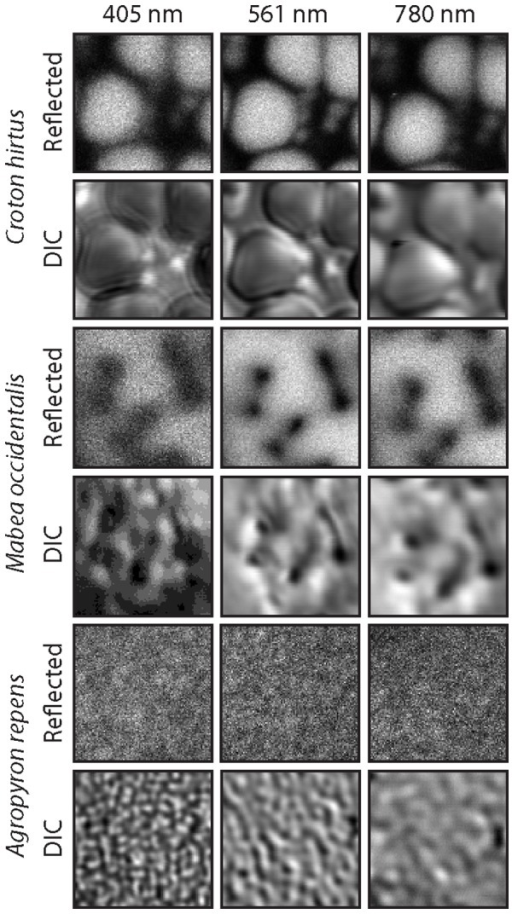

In [17]:
img

In [18]:
data['list'][0]['image']['caption']

'Cropped and zoomed-in views of the surface texture of Croton hirtus, Mabea occidentalis and Agropyron repens.Pollen grains imaged using confocal <b>microscopy</b> (405 nm and 561 nm), two-photon <b>microscopy</b> (780 nm) and DIC <b>microscopy</b> (405 nm, 561 nm and 780 nm). Images highlight the effect of wavelength, resolution, absorption and detectablility on the recovery of textural information from pollen grains. In order to acquire an image of C. hirtus and M. occidentalis using 405 nm DIC, the master gain was increased during acquisition. All images are raw data, measure 5 µm in the X-Y direction and are displayed in linear intensity profiles.'

In [8]:
%matplotlib inline
from ipywidgets import interactive, fixed

import ipywidgets as widgets

In [43]:
import numpy as np
import ipywidgets as widgets
%matplotlib inline

output = widgets.Output(layout={'border': '1px solid black'})
class ImageDisplay(object):
    def __init__(self):
        self.i = 0
        self.random_button = widgets.Button(
            description='randomize self.val')
        self.random_button.on_click(self.button_pressed)

    def update_random(self):
        self.val = np.random.rand()
        print(self.val)
    
    def show_image(self):
        sample_img_url = data['list'][self.i]['imgLarge']
        caption = data['list'][self.i]['image']['caption']
        p = 'https://openi.nlm.nih.gov/' + sample_img_url
        response = requests.get(p)
        img = Image.open(BytesIO(response.content))
        self.i += 1
        output.clear_output()
        display(img)
        display(caption)
    
    @output.capture()
    def button_pressed(self,*args):
        self.show_image()


buttonObject = ImageDisplay()
display(buttonObject.random_button)  # display works but is not required if on the last line in Jupyter cell.
#buttonObject.random_button  # Widget to be dispalyed - must last last line in cell
display(output, 'hi')

Button(description='randomize self.val', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

'hi'

In [ ]:
# widgets.HBox([widgets.VBox([a, b, c]), out])